<h3>Class Diagram</h3>

Class diagrams are tool to visualize classes in our application during system design and documentation. A class can be visualized as below

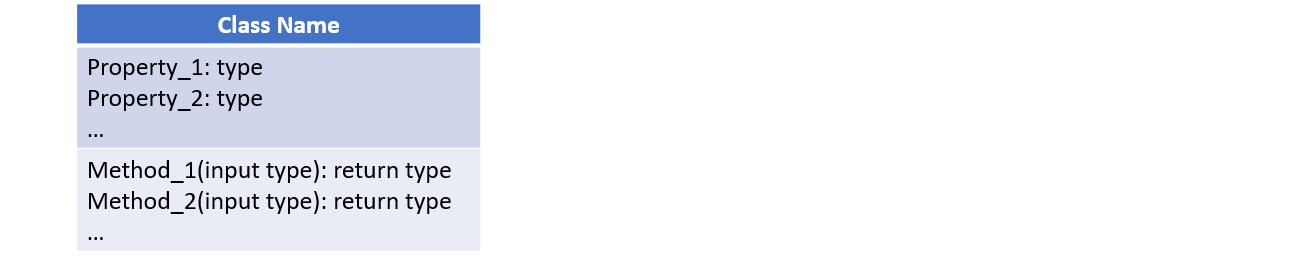

Note that we don't need to include the \_\_init\_\_() and \_\_str\_\_() methods in the diagrams, since all classes should have them

For example, a Student class with id, first name, last name, and setters and getters

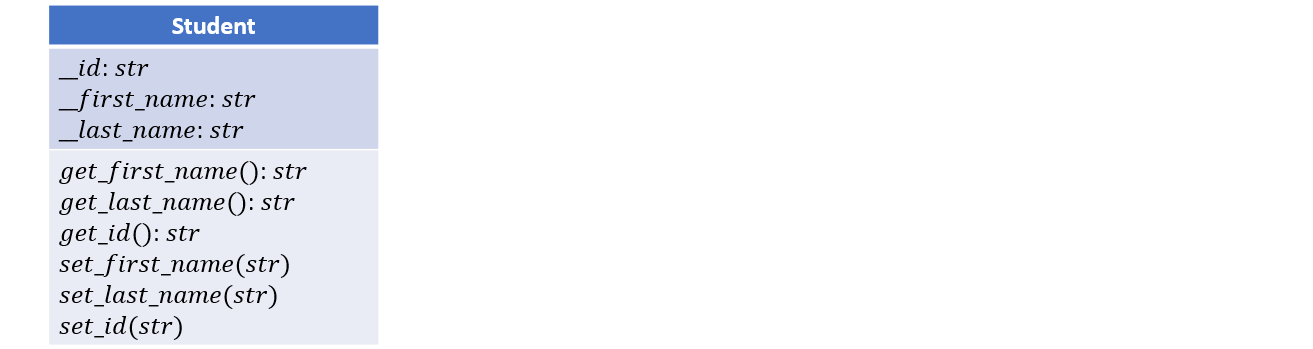


Classes can interact with each other to model objects in an application. For example, in an application that manages products and orders, we may have the below class diagram

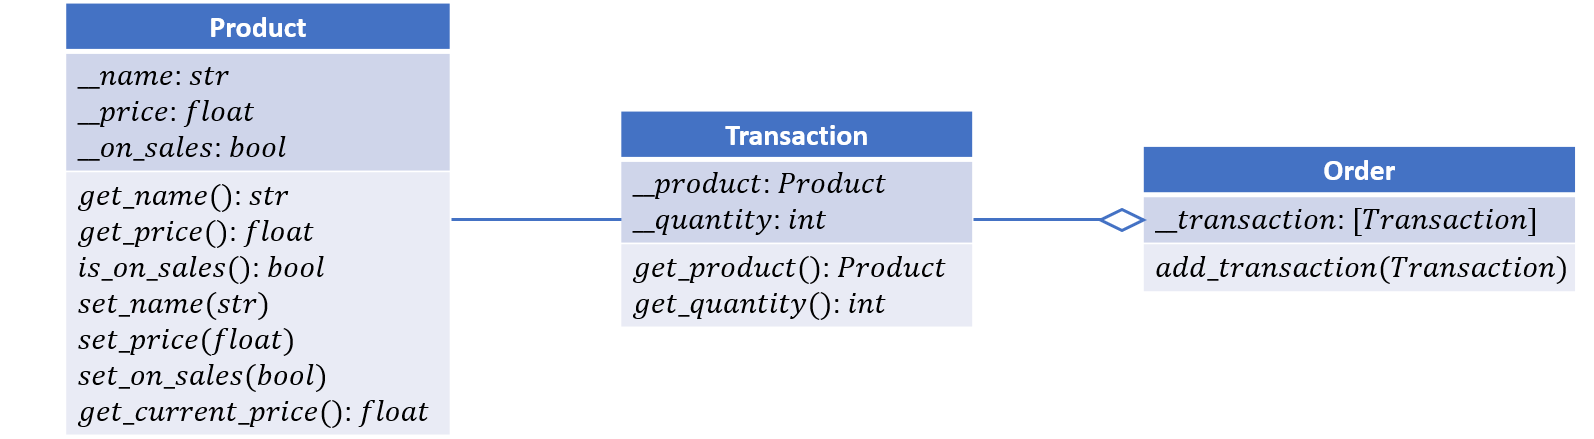

We have three classes: Product, Transaction, and Order.
- Product models the individual products that we have in store
- Transaction models the individual entries in each order. for example, an order has an entry of 10 pens being purchased
- Order models the orders - groups of transactions made by customers. For example, an order has 10 pens, 5 books, 2 markers...

The connections represent the relationship between the classes. The connection between Product and Transaction means association (kind of like the M:N in database), and the connection between Transaction and Order means aggregation - one Order includes multiple Transaction

Note that this is a very simple class architecture. In order to have this application worked with database systems, we need to add much more to the classes (e.g. ID attributes, methods to load from and save to a DBMS...)

The implementation of the classes are as follows

In [1]:
class Product:
    
    def __init__(self, name, price, on_sales=False):
        self.__name = name
        self.__price = price
        self.__on_sales = on_sales #this is a bool attribute, if true, the price of the product becomes 80% of the __price value
    
    #getters 
    def get_name(self):
        return self.__name
    
    def get_price(self):
        return self.__price
    
    def is_on_sales(self):
        return self.__on_sales
    
    #setters
    def set_name(self, name):
        self.__name = name
    
    def set_price(self, price):
        self.__price = price
    
    def set_on_sales(self, on_sales):
        self.__on_sales = on_sales
    
    #current price = price * 80% if on sales
    def get_current_price(self):
        if self.__on_sales:
            return self.__price * 0.8
        return self.__price        
        
    def __str__(self):
        return self.__name + ': %.2f' % self.get_current_price()

In [2]:
#we usually test our class by creating a few objects and print them out
pen = Product('Pen',1.50,True)
print(pen)
book = Product('Book',5.50)
print(book)

Pen: 1.20
Book: 5.50


In [14]:
class Transaction:
    
    def __init__(self,product,quantity):
        self.__product = product #this is a Product object - representing the product purchased in this transaction
        self.__quantity = quantity
    
    #not all properties need both setters and getters
    #for example, we may not want to change a transaction once it is made
    #then we won't write setters for the attributes
    #note that if we want, we can write a method in Order class to cancel a transaction though
    def get_product(self):
        return self.__product
    
    def get_quantity(self):
        return self.__quantity
    
    def __str__(self):
        #this __str__() method returns the product, quantity, and price 
        #ordered nicely so that we can use it in the Order class
        return '%-10s %-10d %-10.2f' % (self.__product.get_name(), self.__quantity, self.__product.get_current_price())
#         return self.__product.get_name() + '        ' + str(self.__quantity) + '          ' + str(self.__product.get_current_price())

In [15]:
#a few test with the Transaction class
transaction_1 = Transaction(pen, 5)
print(transaction_1)

transaction_2 = Transaction(book, 2)
print(transaction_2)

Pen        5          1.20      
Book       2          5.50      


In [16]:
import os

class Order:
    
    def __init__(self):
        self.__transactions = [] #an order has a list of individual transactions
    
    def add_transaction(self, transaction):
        self.__transactions.append(transaction) 
    
    #remove something is a bit more complicated
    #because it involves searching for the object
    #I will discuss searching in the next module
    
    #this method return all transactions to a list
    #so we can further work with them
    #instead of a big string like the __str__() method
    def get_all_transactions(self):
        return self.__transactions
    
    
    #this will return a string of all products, quantities, and prices
    #and the order total
    #in a nice format
    def __str__(self):
        info = '%-10s %-10s %-10s' % ('Product','Quantity','Price')
        total = 0
        #loop through the transactions list and add each specific transaction to the order receipt
        for transaction in self.__transactions:
            info += os.linesep
            product = transaction.get_product()
            total += product.get_current_price() * transaction.get_quantity()
            info += str(transaction) #we need to use transaction in str() to activate its __str__() method
        info += os.linesep + '---'
        info += os.linesep + '%-20s %-10.2f' % ('Total: ', total)
        return info

In [17]:
#similarly, some tests
pen = Product('Pen',1.50,True)
book = Product('Book',5.50)
pencil = Product('Pencil',2.50)
marker = Product('Marker',3.50)

transaction_1 = Transaction(pen, 5)
transaction_2 = Transaction(book, 20)
transaction_3 = Transaction(pencil, 3)
transaction_4 = Transaction(marker, 5)

order_1 = Order()
order_1.add_transaction(transaction_1)
order_1.add_transaction(transaction_2)
order_1.add_transaction(transaction_3)
order_1.add_transaction(transaction_4)

print(order_1)

Product    Quantity   Price     
Pen        5          1.20      
Book       20         5.50      
Pencil     3          2.50      
Marker     5          3.50      
---
Total:               141.00    


In [18]:
transaction_5 = Transaction(pen, 3)
transaction_6 = Transaction(book, 2)

order_2 = Order()
order_2.add_transaction(transaction_5)
order_2.add_transaction(transaction_6)
print(order_2)

Product    Quantity   Price     
Pen        3          1.20      
Book       2          5.50      
---
Total:               14.60     


In [19]:
#We can even input new object directly to a method
order_3 = Order()
order_3.add_transaction(Transaction(pencil,3))
order_3.add_transaction(Transaction(marker,7))
print(order_3)

Product    Quantity   Price     
Pencil     3          2.50      
Marker     7          3.50      
---
Total:               32.00     


In [20]:
#but do not overdo it, your code can become very cryptic and confusing
order_4 = Order()
order_4.add_transaction(Transaction(Product('Scissor',5.00,True),1))
order_4.add_transaction(Transaction(Product('Paper',4.00),2))
order_4.add_transaction(Transaction(Product('Notebook',3.50),5))
print(order_4)

Product    Quantity   Price     
Scissor    1          4.00      
Paper      2          4.00      
Notebook   5          3.50      
---
Total:               29.50     
